In [64]:
import os

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from numpy import asarray
from os import listdir
from skimage.io import imshow

from skimage.feature import daisy, match_descriptors
import warnings
warnings.filterwarnings("ignore")

In [63]:
folder_dir = "chest_xray/test/NORMAL/"; h=100; w=100
data = []
for images in os.listdir(folder_dir):
    image = Image.open(folder_dir + images)
    image = image.resize((h,w))
    # convert image to numpy array
    data_i = asarray(image)
    feature_i = data_i.flatten()
    data.append(feature_i)
X = np.array(data)

## Exceptional Work

In [127]:
def apply_daisy(row,shape): # no reshape in this function
    feat = daisy(row.reshape(shape), step=5, radius=5, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    s = feat.shape
    return feat.reshape((s[0]*s[1],s[2]))

daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
daisy_features.shape

(234, 324, 68)

In [158]:
def find_match_percentages(min_ix, max_ix, daisy_features, h=100, w=100, figsize=(10,50), plot=True):
    
    ix_range = np.arange(min_ix, max_ix, 1)
    match_percentages = []; ix = []; ix_match = []
    for i in ix_range:
        match_percentages_i = []
        for j in range(len(daisy_features)):
            if j == i:
                continue
            matches_ij = match_descriptors(daisy_features[i], daisy_features[j], cross_check=True, max_ratio=0.8)
            match_percentages_ij = matches_ij.shape[0]/len(daisy_features[i])
            match_percentages_i.append(match_percentages_ij)
        match_percentages_i = np.array(match_percentages_i)
        ix_i = np.where(match_percentages_i == match_percentages_i.max())[0][0]
        match_percentages.append(match_percentages_i); ix.append(i); ix_match.append(ix_i)
    
    if plot == True:
        plt.figure(figsize=figsize)
        k = 0
        for m in range(len(ix_range)):
            plt.subplot(len(ix),2,1+k)
            plt.imshow(X[ix[m]].reshape(h,w), cmap=plt.cm.gray)
            plt.grid(False)

            plt.subplot(len(ix_range),2,2+k)
            plt.imshow(X[ix_match[m]].reshape(h,w), cmap=plt.cm.gray)
            plt.grid(False)
            k += 2
            
    return match_percentages, ix, ix_match

CPU times: user 10.4 s, sys: 49.2 ms, total: 10.5 s
Wall time: 10.5 s


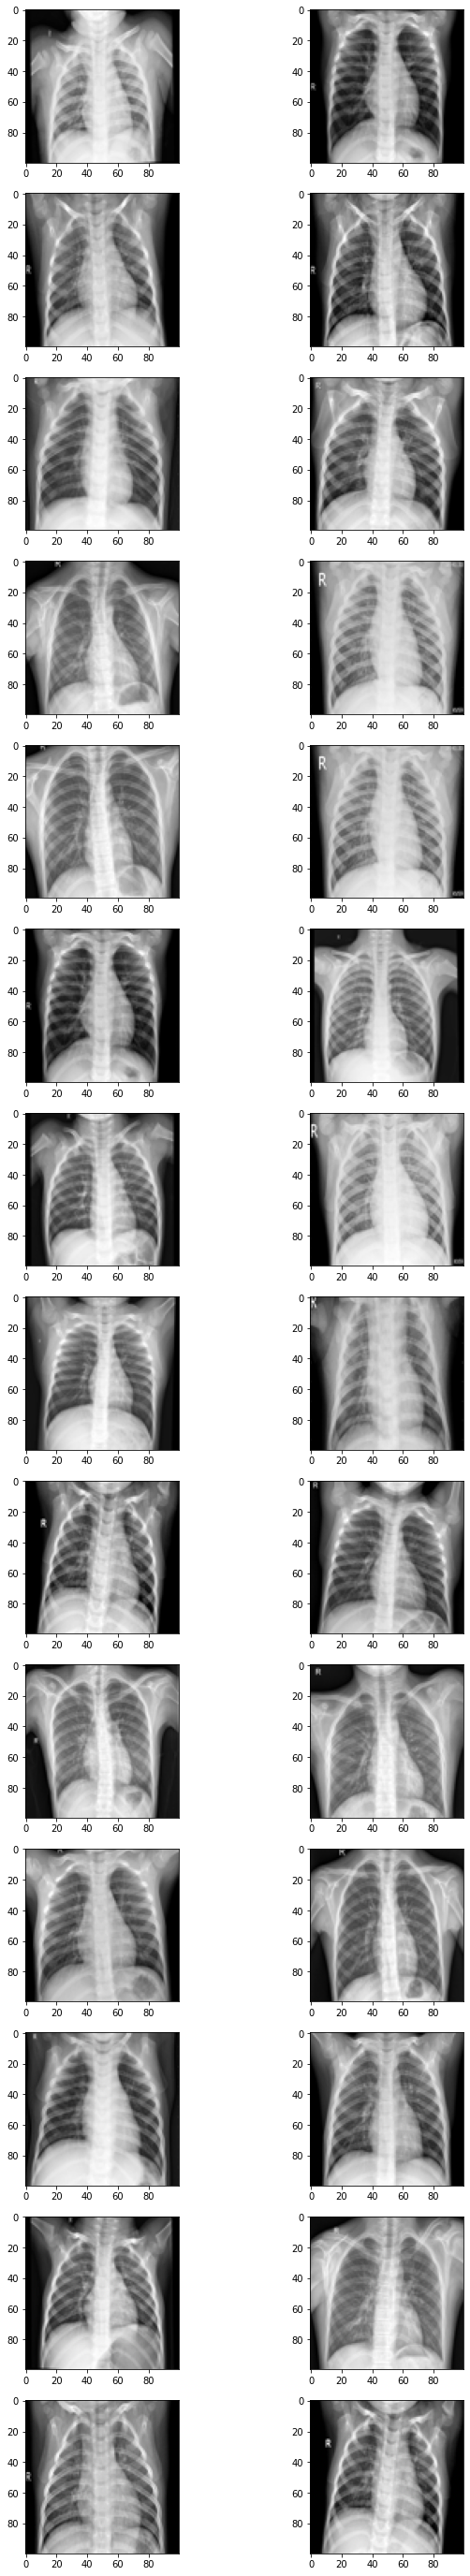

In [159]:
%%time
ix_min = 6; ix_max = 20
match_percentages, ix, ix_match = find_match_percentages(ix_min, ix_max, daisy_features)